In [37]:
import skimage.io
import sklearn.cluster

import lib.ocr

import matplotlib.pyplot as plt
%matplotlib inline

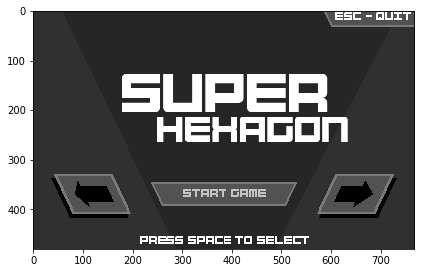

In [38]:
frame = skimage.io.imread("datasets/frame_splash.png")
skimage.io.imshow(frame)

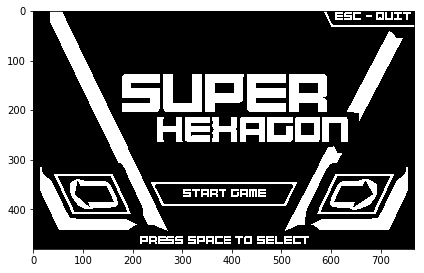

In [39]:
preprocessed_frame = lib.ocr.preprocess_image(frame, mode="PRECISE")
skimage.io.imshow(preprocessed_frame)

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 547 µs


NameError: name 'mpatches' is not defined

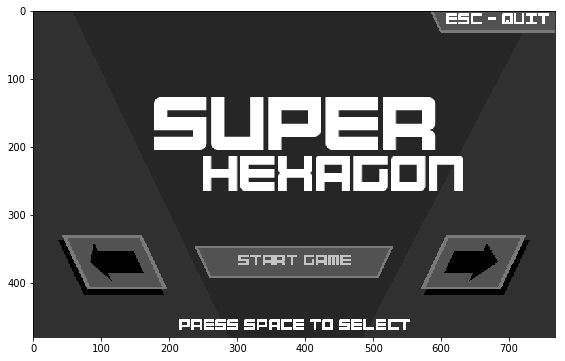

In [40]:
%time
data = lib.ocr.extract_character_and_word_data(
    frame, 
    word_window_shape="rectangle", 
    word_window_size=(1, 1),
    preprocess_mode="PRECISE"
)

data["word"]["bounding_boxes"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(frame)

for region_bbox in data["word"]["bounding_boxes"]:
    minr, minc, maxr, maxc = region_bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, rectangle
from skimage.color import label2rgb

thresh = threshold_otsu(preprocessed_frame)
bw = closing(preprocessed_frame > thresh, rectangle(1, 1))

plt.figure()
plt.imshow(bw, cmap="gray")

cleared = clear_border(bw)

plt.figure()
plt.imshow(cleared, cmap="gray")

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=preprocessed_frame)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

NameError: name 'preprocessed_frame' is not defined

In [ ]:
skimage.io.imshow(preprocessed_frame)

In [ ]:
objects = lib.ocr.detect_image_objects_closing(preprocessed_frame, window_size=1)

In [ ]:
image_data = lib.ocr.normalize_objects(preprocessed_frame, objects[20:29])

In [ ]:
skimage.io.imshow(image_data[2])

In [ ]:
%time
skimage.io.imshow(clear_border(preprocessed_frame))

In [ ]:
import numpy as np
from skimage import exposure

from skimage.filters import threshold_otsu
from skimage.morphology import closing, square

def preprocess_image(image):
    print(image.dtype)
    grayscale_image = skimage.color.rgb2gray(image)
    print(grayscale_image.dtype)

    lower, higher = np.percentile(grayscale_image, (5, 95))
    contrast_image = exposure.rescale_intensity(grayscale_image, in_range=(lower, higher))
    
    print(contrast_image.dtype)

    threshold = threshold_otsu(contrast_image)
    bw = closing(contrast_image > threshold, square(1))

    return bw

In [ ]:
preprocessed_frame = preprocess_image(frame)

CPU times: user 283 ms, sys: 0 ns, total: 283 ms
Wall time: 283 ms


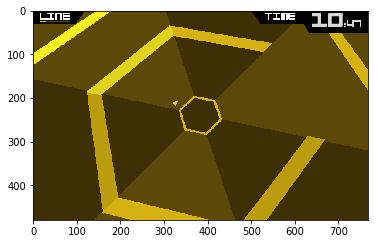

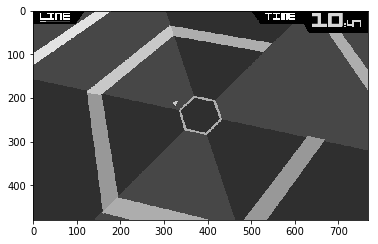

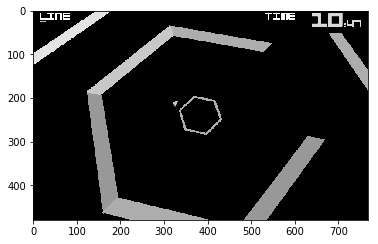

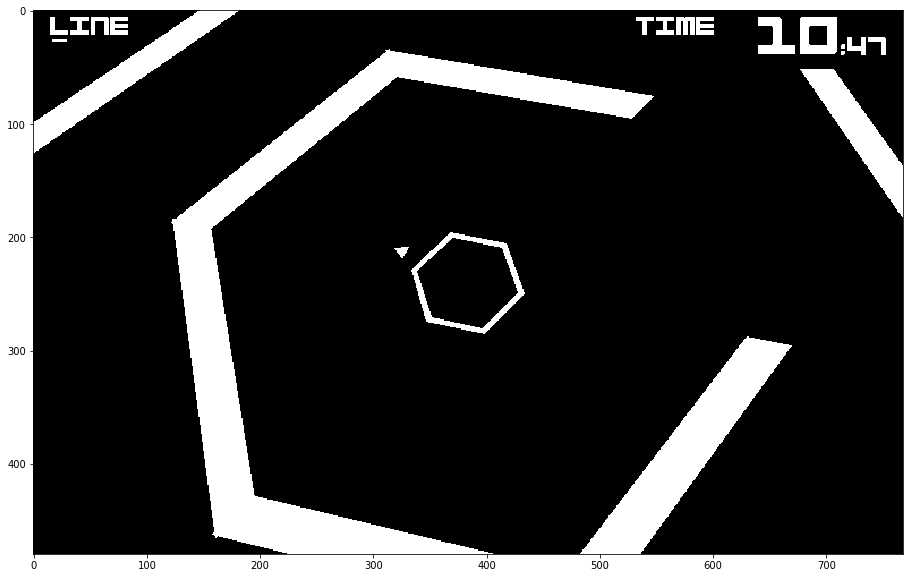

In [76]:
%%time

import skimage.io
import skimage.color
import skimage.filters
import skimage.exposure
import skimage.transform
import skimage.morphology

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

frame = skimage.io.imread("datasets/collect_frames/frame_798c7cea-6868-4461-a628-0d17fd948cb2.png")
plt.figure()
plt.imshow(frame)

gray_frame = np.array(skimage.color.rgb2gray(frame) * 255, dtype="uint8")
plt.figure()
plt.imshow(gray_frame, cmap="gray")

histogram = skimage.exposure.histogram(gray_frame[40:])
max_indices = np.argpartition(histogram[0], -3)[-3:]

for index in sorted(max_indices)[:2]:
    gray_frame[gray_frame == index] = 0
        
plt.figure()
plt.imshow(gray_frame, cmap="gray")

threshold = skimage.filters.threshold_otsu(gray_frame[40:])
bw_frame = gray_frame > threshold
plt.figure(figsize=(16, 10))
plt.imshow(bw_frame, cmap="gray")

In [46]:
center = [c // 2 for c in bw_frame.shape]

In [47]:
def meshgrid_around_center_for_shape(shape):
    # Y
    if shape[0] % 2 == 0:
        half_y = shape[0] // 2
        y_offset = np.arange(-half_y + 1, half_y, 1)
        y = np.r_[y_offset[:half_y], [0], y_offset[half_y:]] 
    else:
        y = np.arange(-(shape[0] // 2), shape[0] // 2 + 1, 1)
    # X
    if shape[1] % 2 == 0:
        half_x = shape[1] // 2
        x_offset = np.arange(-half_x + 1, half_x, 1)
        x = np.r_[x_offset[:half_x], [0], x_offset[half_x:]] 
    else:
        x = np.arange(-(shape[1] // 2), shape[1] // 2 + 1, 1)

    return np.meshgrid(x, y)

def distances_to_center(shape):
    x, y = meshgrid_around_center_for_shape(shape)
    points = np.array([y, x])
    
    return np.linalg.norm(points, axis=0)

def angles_to_center(shape):
    x, y = meshgrid_around_center_for_shape(shape)
    return np.rad2deg(np.arctan2(x, y)).astype("int16")

(480, 768)


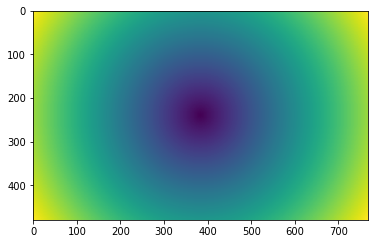

In [48]:
frame_distances = distances_to_center(bw_frame.shape)
print(frame_distances.shape)
plt.imshow(frame_distances)

[[-121 -122 -122 ...,  122  122  121]
 [-121 -121 -121 ...,  121  121  121]
 [-121 -121 -121 ...,  121  121  121]
 ..., 
 [ -58  -58  -58 ...,   58   58   58]
 [ -58  -58  -58 ...,   58   58   58]
 [ -58  -57  -57 ...,   57   57   58]]


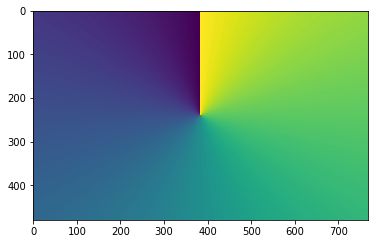

In [28]:
frame_angles = angles_to_center(bw_frame.shape)
print(frame_angles)
plt.imshow(frame_angles)

In [77]:
from plugins.SuperHexagonGameAgentPlugin.files.helpers.frame_processing import *

player_bounding_box = get_player_character_bounding_box(bw_frame, (129, 264, 366, 513))
player_bounding_box_center = (
    (player_bounding_box[0] + player_bounding_box[2]) // 2,
    (player_bounding_box[1] + player_bounding_box[3]) // 2,
)

player_to_center_angle = frame_angles[player_bounding_box_center]
player_to_center_distance = frame_distances[player_bounding_box_center]

# bw_frame[frame_angles == player_to_center_angle] = 1
# bw_frame[frame_angles == player_to_center_angle + 30] = 1
# bw_frame[frame_angles == player_to_center_angle - 30] = 1

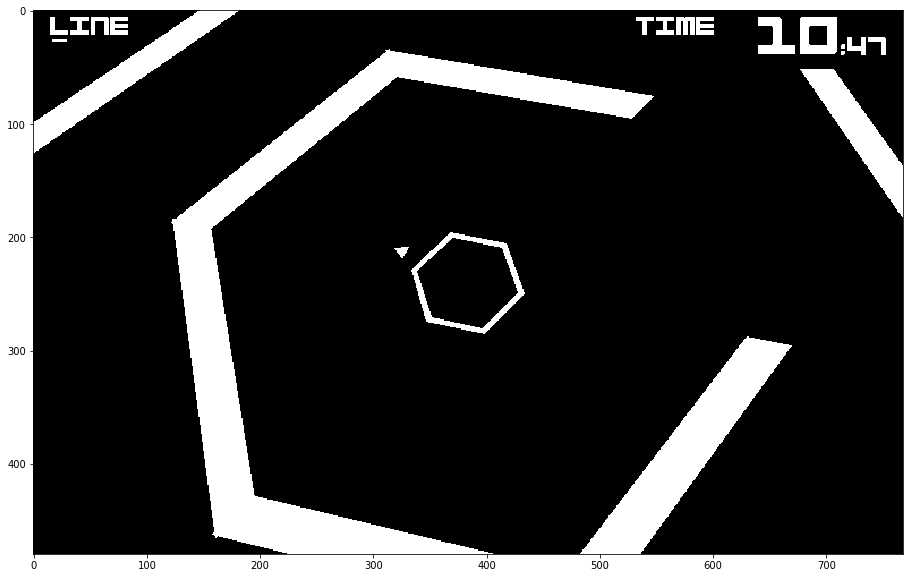

In [78]:
plt.figure(figsize=(16,10))
plt.imshow(bw_frame, cmap="gray")

In [359]:
skimage.io.imsave("test.png", np.array(bw_frame * 255, dtype="uint8"))

In [67]:
# Mask out center & player
bw_frame[frame_distances < (player_to_center_distance + (player_bounding_box[3] - player_bounding_box[1]))] = 0

{'Ray Player + 90': 0, 'Ray Player + 60': -30, 'Ray Player + 30': -60, 'Ray Player': -90, 'Ray Player - 30': -120, 'Ray Player - 60': -150, 'Ray Player - 90': 180}
38.0
39.4461658466
40.3112887415
42.0
39.4461658466
38.0788655293
36.0


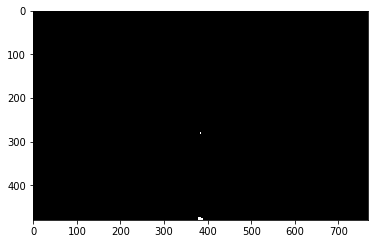

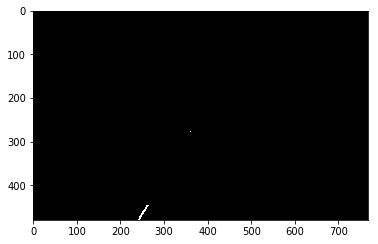

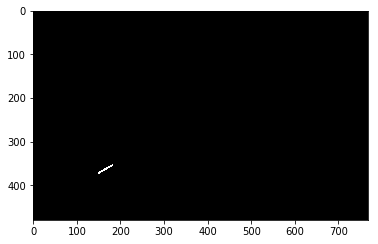

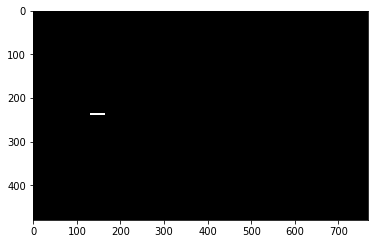

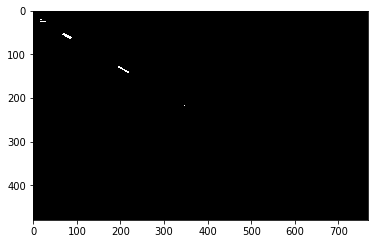

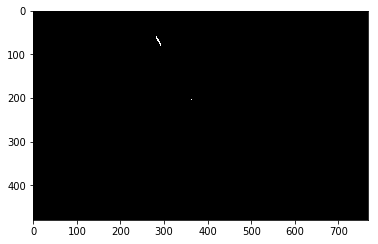

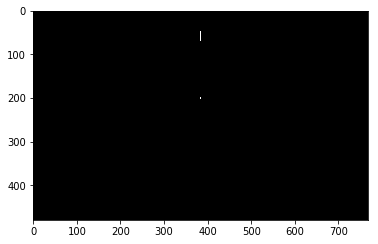

In [95]:
rays = {
    "Ray Player + 90": (player_to_center_angle + 90 + 179) % 360 - 179,
    "Ray Player + 60": (player_to_center_angle + 60 + 179) % 360 - 179, 
    "Ray Player + 30": (player_to_center_angle + 30 + 179) % 360 - 179,
    "Ray Player": player_to_center_angle, 
    "Ray Player - 30": (player_to_center_angle - 30 + 179) % 360 - 179,
    "Ray Player - 60": (player_to_center_angle - 60 + 179) % 360 - 179, 
    "Ray Player - 90": (player_to_center_angle - 90 + 179) % 360 - 179
}

print(rays)

for label, angle in rays.items():
    # Make a mask out of the ray collisions
    ray_collision_mask = ((frame_angles == angle) & (bw_frame == 1))
    collision_distances = frame_distances[ray_collision_mask == True]

    if not collision_distances.size:
        collision_distance = 9999
    else:
        collision_distance = np.min(collision_distances)

    print(collision_distance)

    plt.figure()
    plt.imshow(ray_collision_mask, cmap="gray")

In [87]:
frame_angles[0, 100]

-130

In [61]:
bw_frame.shape

(480, 768)

In [ ]:
-203 => 157

In [91]:
(200 + 180) % 360 - 180

-160

In [96]:
rays

{'Ray Player': -90,
 'Ray Player + 30': -60,
 'Ray Player + 60': -30,
 'Ray Player + 90': 0,
 'Ray Player - 30': -120,
 'Ray Player - 60': -150,
 'Ray Player - 90': 180}

In [97]:
d = {'Ray Player': 119.85407794480753,
 'Ray Player + 30': 9999,
 'Ray Player + 60': 9999,
 'Ray Player + 90': 105.80170130957252,
 'Ray Player - 30': 106.47065323364932,
 'Ray Player - 60': 106.92988356862641,
 'Ray Player - 90': 93.813645062965122}


In [104]:
max(d.items(), key=lambda i: i[1])

('Ray Player + 30', 9999)

In [106]:
np.linspace(0.01, 0.2, 20)

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ])

In [108]:
float("1a2.12")

ValueError: could not convert string to float: '1a2.12'

In [109]:
np.mean([1.23, 4.32])

2.7750000000000004

In [128]:
np.linspace(0.001, 0.05, 99)

array([ 0.001 ,  0.0015,  0.002 ,  0.0025,  0.003 ,  0.0035,  0.004 ,
        0.0045,  0.005 ,  0.0055,  0.006 ,  0.0065,  0.007 ,  0.0075,
        0.008 ,  0.0085,  0.009 ,  0.0095,  0.01  ,  0.0105,  0.011 ,
        0.0115,  0.012 ,  0.0125,  0.013 ,  0.0135,  0.014 ,  0.0145,
        0.015 ,  0.0155,  0.016 ,  0.0165,  0.017 ,  0.0175,  0.018 ,
        0.0185,  0.019 ,  0.0195,  0.02  ,  0.0205,  0.021 ,  0.0215,
        0.022 ,  0.0225,  0.023 ,  0.0235,  0.024 ,  0.0245,  0.025 ,
        0.0255,  0.026 ,  0.0265,  0.027 ,  0.0275,  0.028 ,  0.0285,
        0.029 ,  0.0295,  0.03  ,  0.0305,  0.031 ,  0.0315,  0.032 ,
        0.0325,  0.033 ,  0.0335,  0.034 ,  0.0345,  0.035 ,  0.0355,
        0.036 ,  0.0365,  0.037 ,  0.0375,  0.038 ,  0.0385,  0.039 ,
        0.0395,  0.04  ,  0.0405,  0.041 ,  0.0415,  0.042 ,  0.0425,
        0.043 ,  0.0435,  0.044 ,  0.0445,  0.045 ,  0.0455,  0.046 ,
        0.0465,  0.047 ,  0.0475,  0.048 ,  0.0485,  0.049 ,  0.0495,  0.05  ])

In [131]:
float(".")

ValueError: could not convert string to float: '.'